<a href="https://colab.research.google.com/github/AJH0625/CmdProject/blob/main/RNNAttention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**7.1**
---

##미디 파일 적재

In [1]:
import music21
from music21 import converter

filename='팥빙수-윤종신'
file = './{}.mid'.format(filename)

original_score = converter.parse(file).chordify()

chordify 메서드: 여러 파트로 나누어진 음표를 하나의 파트에서 동시에 연주되는 화음으로 압축함

In [2]:
original_score.show('text')

{0.0} <music21.instrument.ElectricBass Electric Bass>
{0.0} <music21.tempo.MetronomeMark allegro Quarter=134.0>
{0.0} <music21.key.Key of C major>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Rest rest>
{4.0} <music21.chord.Chord C2 D2 G#2 C#3 D4 F#4 A4 D5>
{4.25} <music21.chord.Chord D2 D4 F#4 A4>
{4.5} <music21.chord.Chord D2 G#2 D4 F#4 A4 D5 F#5 A5>
{4.75} <music21.chord.Chord D4 F#4 A4 D5 E5 F#5 A5>
{5.0} <music21.chord.Chord D2 E2 G#2 D3 D4 F#4 A4 F#5>
{5.25} <music21.chord.Chord D2 D4 F#4 A4>
{5.5} <music21.chord.Chord G#2 D4 F#4 A4 D5 F#5 A5>
{5.75} <music21.chord.Chord A1 D2 D4 F#4 A4 D5>
{6.0} <music21.chord.Chord C2 D2 G#2 D4 F#4 A4 E5>
{6.25} <music21.chord.Chord D2 D4 F#4 A4 E5>
{6.5} <music21.chord.Chord C2 F#2 B-2 A3 D4 F#4 A4 D5 F#5 A5>
{6.75} <music21.chord.Chord F#2 A3 D4 F#4 A4 F#5>
{7.0} <music21.chord.Chord D2 E2 G#2 B3 D4 F#4 A4 B4 E5>
{7.25} <music21.chord.Chord D2 B3 D4 F#4 A4 B4 E5>
{7.5} <music21.chord.Chord A1 G#2 C4 D4 F#4 A4 C5 D5 F#5 A5>
{7.7

##**7.2**
---

##데이터 추출
- 악보를 순회하며 각 음표(와 쉼표)의 피치와 박자를 두 개의 리스트로 추출함
- 코드 전체는 하나의 문자열로 저장됨 / 코드의 개별 음표는 점으로 구분
- 각 음표의 이름 뒤에 있는 숫자는 음표가 속한 옥타브를 지칭

In [3]:
from music21 import chord, note

In [4]:
notes = []
durations = []

for element in original_score.flat:

  if isinstance(element, chord.Chord):
    notes.append('.'.join(n.nameWithOctave for n in element.pitches))
    durations.append(element.duration.quarterLength)

  if isinstance(element, note.Note):
    if element.isRest:
      notes.append(str(element.name))
      durations.append(element.duration.quarterLength)

    else:
      notes.append(str(element.nameWithOctave))
      durations.append(element.duration.quarterLength)

In [5]:
print('\nduration','pitch')
for n,d in zip(notes, durations):
  print(d, '\t', n)


duration pitch
0.25 	 C2.D2.G#2.C#3.D4.F#4.A4.D5
0.25 	 D2.D4.F#4.A4
0.25 	 D2.G#2.D4.F#4.A4.D5.F#5.A5
0.25 	 D4.F#4.A4.D5.E5.F#5.A5
0.25 	 D2.E2.G#2.D3.D4.F#4.A4.F#5
0.25 	 D2.D4.F#4.A4
0.25 	 G#2.D4.F#4.A4.D5.F#5.A5
0.25 	 A1.D2.D4.F#4.A4.D5
0.25 	 C2.D2.G#2.D4.F#4.A4.E5
0.25 	 D2.D4.F#4.A4.E5
0.25 	 C2.F#2.B-2.A3.D4.F#4.A4.D5.F#5.A5
0.25 	 F#2.A3.D4.F#4.A4.F#5
0.25 	 D2.E2.G#2.B3.D4.F#4.A4.B4.E5
0.25 	 D2.B3.D4.F#4.A4.B4.E5
0.25 	 A1.G#2.C4.D4.F#4.A4.C5.D5.F#5.A5
0.25 	 C4.D4.F#4.A4.C5
0.25 	 G1.C2.G#2.G3.B3.C4.D4.C5.D5
0.25 	 G1.G3.B3.C4.D4.C5
0.25 	 G1.G#2.G3.B3.C4.D4.C5.D5.F#5.A5
0.25 	 G3.B3.C4.D4.C5.E5
0.25 	 G1.E2.G#2.G3.B3.C4.D4.C5.F#5
0.25 	 G1.G3.B3.C4.D4.C5.F#5
0.25 	 G1.G#2.G3.B3.C4.D4.C5.D5.F#5.A5
0.25 	 E1.D2.G3.B3.C4.D4.C5.D5
0.25 	 G1.C2.D2.G#2.G3.B3.C4.D4.C5.E5
0.25 	 G1.D2.G3.B3.C4.D4.C5.E5
0.25 	 B1.C2.B-2.G3.B3.D4.D5.F#5.A5
0.25 	 B1.G3.B3.D4.F#5
0.25 	 G1.B1.E2.G#2.G3.B3.D4.E5
0.25 	 G1.G3.B3.D4.E5
0.25 	 G1.C2.G#2.G3.B3.D4.D5.F#5.A5
0.25 	 G1.G3.B3.D4
0.25 	 C2

##음악 생성 모델 훈련하기

In [6]:
from tensorflow.keras.optimizers import *

In [7]:
import os
import pickle
import numpy
from music21 import note, chord

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils.vis_utils import plot_model

from RNNAttention import get_distinct, create_lookups, prepare_sequences, get_music_list, create_network

##파라미터 설정

In [10]:
#실행 파라미터
section = 'compose'
run_id = '1'
music_name = '팥빙수-윤종신'

run_folder = 'run/{}/'.format(section)
run_folder += '_'.join([run_id, music_name])

print(run_folder)

store_folder = os.path.join(run_folder, 'store')
data_folder = os.path.join('data', music_name)

if not os.path.exists(run_folder):
  os.mkdir(run_folder)
  os.mkdir(os.path.join(run_folder, 'store'))
  os.mkdir(os.path.join(run_folder, 'output'))
  os.mkdir(os.path.join(run_folder, 'weights'))
  os.mkdir(os.path.join(run_folder, 'viz'))

mode = 'build' #load

#데이터 파라미터
intervals = range(1)
seq_len = 32

#하이퍼 파라미터
embed_size = 100
rnn_units = 256
use_attention = True

run/compose/1_팥빙수-윤종신


##악보 추출

In [13]:
if mode == 'build':
  
  music_list, parser = get_music_list(data_folder)
  print(len(music_list), 'files in total')

  notes = []
  durations = []

  for i, file in enumerate(music_list):
    print(i+1, "Parsing %s"%file)
    original_score = parser.parse(file).chordify()

    for interval in intervals:

      score = original_score.transpose(interval)

      notes.extend(['START'] * seq_len)
      durations.extend([0]*seq_len)

      for element in score.flat:

        if isinstance(element, note.Note):
          if element.isRest:
            notes.append(str(element.name))
            durations.append(element.duration.quarterLength)
          else:
            notes.append(str(element.nameWithOctave))
            durations.append(element.duration.quarterLength)

        if isinstance(element, chord.Chord):
          notes.append('.'.join(n.nameWithOctave for n in element.pitches))
          durations.append(element.duration.quarterLength)

  with open(os.path.join(store_folder, 'notes'), 'wb') as f:
    pickle.dump(notes, f)

  with open(os.path.join(store_folder, 'durations'), 'wb') as f:
    pickle.dump(durations, f)

else:
  with open(os.path.join(store_folder, 'notes'), 'rb') as f:
    pickle.dump(notes, f)

  with open(os.path.join(store_folder, 'durations'), 'rb') as f:
    pickle.dump(durations, f)

1 files in total
1 Parsing data/팥빙수-윤종신/팥빙수-윤종신.mid


##룩업 테이블 만들기

In [14]:
#고유한 음표와 박자 얻어오기
note_names, n_notes = get_distinct(notes)
duration_names, n_durations = get_distinct(durations)
distincts = [note_names, n_notes, duration_names, n_durations]

with open(os.path.join(store_folder, 'distincts'), 'wb') as f:
  pickle.dump(distincts, f)

#음표와 박자 룩업 딕셔너리 만들고 저장하기
note_to_int, int_to_note = create_lookups(note_names)
duration_to_int, int_to_duration = create_lookups(duration_names)
lookups = [note_to_int, int_to_note, duration_to_int, int_to_duration]

with open(os.path.join(store_folder, 'lookups'), 'wb') as f:
  pickle.dump(lookups, f)

In [15]:
print('\nnote_to_int')
note_to_int


note_to_int


{'A1.A2.A3.C#4.E4.A4': 0,
 'A1.A2.A3.C#4.E4.F#4.A4': 1,
 'A1.A2.A3.C#4.E4.F#4.A4.A5': 2,
 'A1.A2.A4.C#5.E5': 3,
 'A1.A2.C#3.A3.C#4': 4,
 'A1.A2.C#3.E-3.A3.C#4.E4': 5,
 'A1.A3.C#4': 6,
 'A1.A3.C#4.E4': 7,
 'A1.A3.C#4.E4.F#5': 8,
 'A1.A3.C#4.F#5': 9,
 'A1.A3.D4.F#4.A4.D5.F#5.A5': 10,
 'A1.B-2.A3.D4.F#4.A4.F#5': 11,
 'A1.B-2.C4.D4.F#4.A4.C5.D5.F#5.A5': 12,
 'A1.C#2.E2.G#2.A3.C#4.E4.F#4.A4.E5': 13,
 'A1.C#4': 14,
 'A1.C2.A2.B-2.A4.C#5.E5': 15,
 'A1.C2.A2.C#3.E-3.A3.C#4': 16,
 'A1.C2.A2.C#3.E-3.A3.C#4.E4': 17,
 'A1.C2.B-2.A3.C#4.E4.F#4.A4.D5.F#5.A5': 18,
 'A1.C2.B-2.A3.C#4.F#4.A4.D5.F#5.A5': 19,
 'A1.C2.B-2.C#4.A5.C#6.E6': 20,
 'A1.C2.D2.B-2.C#4': 21,
 'A1.C2.D2.G#2.A3.C#4.E4.E5': 22,
 'A1.C2.D2.G#2.A3.C#4.E5': 23,
 'A1.C2.D2.G2.G#2.A3.C#4.E4.E5': 24,
 'A1.C2.E2.F2.B-2.A3.C#4.E4.F#4.A4.D5.F#5.A5': 25,
 'A1.C2.E2.G#2.A2.C#3.A3.C#4.D4.E4.F#4.A4.A5': 26,
 'A1.C2.E2.G#2.A2.C#3.A3.C#4.E4.F#4.A4.A5': 27,
 'A1.C2.G#2.A3.C#4.E4.F#4.A4.D5': 28,
 'A1.C2.G#2.A3.C#4.F#4.A4.D5': 29,
 'A1.D2.A3.C#4.E4.E5

In [16]:
print('\nduration_to_int')
duration_to_int


duration_to_int


{0: 0,
 Fraction(1, 12): 1,
 Fraction(1, 6): 2,
 0.25: 3,
 Fraction(1, 3): 4,
 0.5: 5,
 1.0: 6}

##신경망에 사용할 시퀀스 준비하기

In [17]:
network_input, network_output = prepare_sequences(notes, durations, lookups, distincts, seq_len)

In [18]:
print('pitch input')
print(network_input[0][0])

print('duration input')
print(network_input[1][0])

print('pitch output')
print(network_output[0][0])

print('duration output')
print(network_output[1][0])

pitch input
[361 361 361 361 361 361 361 361 361 361 361 361 361 361 361 361 361 361
 361 361 361 361 361 361 361 361 361 361 361 361 361 361]
duration input
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
pitch output
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

##신경망 만들기

In [19]:
model, att_model = create_network(n_notes, n_durations, embed_size, rnn_units, use_attention)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 100)    36200       input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 100)    700         input_2[0][0]                    
______________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


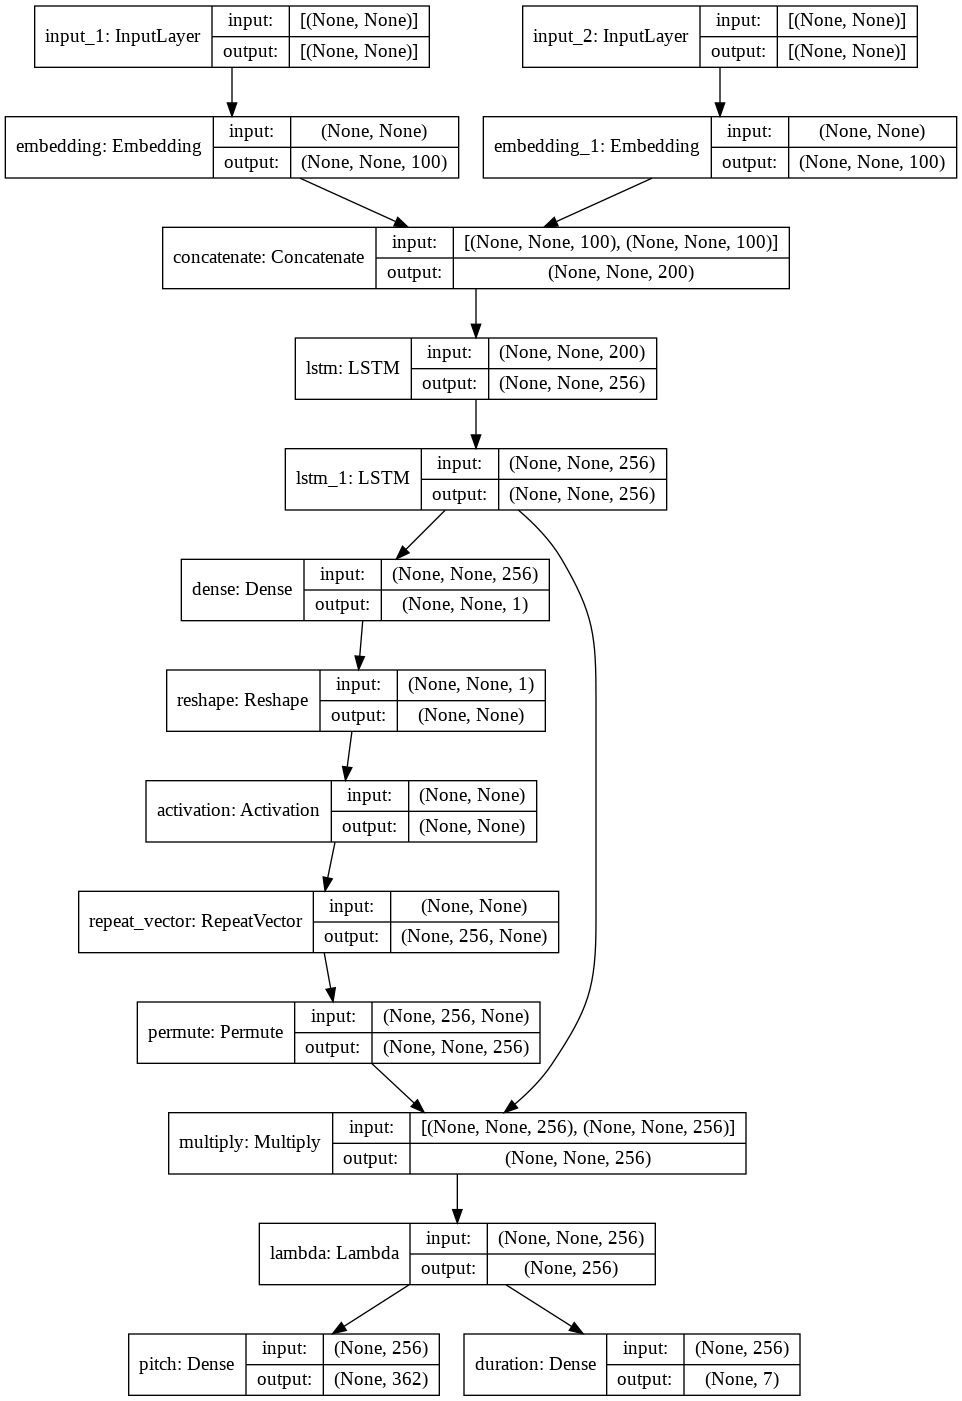

In [20]:
plot_model(model, to_file=os.path.join(run_folder, 'viz/model.png'),
           show_shapes=True, show_layer_names = True)

##신경망 훈련하기

In [21]:
weights_folder = os.path.join(run_folder, 'weights')
#model.load_weights(os.path.join(weights_folder, "weights.h5"))

In [22]:
wegiths_folder = os.path.join(run_folder, 'weights')

checkpoint1 = ModelCheckpoint(
    os.path.join(weights_folder, "weights-improvement-{epoch:02d}\n-{loss:.4f}\n-bigger.h5"),
    monitor='loss',
    verbose=0,
    save_best_only=True,
    mode='min'
)

checkpoint2 = ModelCheckpoint(
    os.path.join(weights_folder, "weights.h5"),
    monitor='loss',
    verbose=0,
    save_best_only = True,
    mode = 'min'
)

early_stopping = EarlyStopping(
    monitor='loss',
    restore_best_weights=True,
    patience=10
)

callbacks_list=[
                checkpoint1,
                checkpoint2,
                early_stopping
]

model.save_weights(os.path.join(weights_folder, "weights.h5"))
model.fit(network_input, network_output, epochs=100, batch_size=32,
          validation_split = 0.2,
          callbacks = callbacks_list,
          shuffle=True)

Epoch 1/100
52/52 [==============================] - 25s 378ms/step - loss: 6.0715 - pitch_loss: 5.6353 - duration_loss: 0.4362 - val_loss: 6.2786 - val_pitch_loss: 5.7405 - val_duration_loss: 0.5381
Epoch 2/100


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


52/52 [==============================] - 17s 333ms/step - loss: 5.4568 - pitch_loss: 5.2147 - duration_loss: 0.2422 - val_loss: 6.0053 - val_pitch_loss: 5.5362 - val_duration_loss: 0.4691
Epoch 3/100
52/52 [==============================] - 18s 337ms/step - loss: 5.1433 - pitch_loss: 4.9244 - duration_loss: 0.2189 - val_loss: 5.5196 - val_pitch_loss: 5.0996 - val_duration_loss: 0.4200
Epoch 4/100
52/52 [==============================] - 18s 341ms/step - loss: 4.7631 - pitch_loss: 4.5612 - duration_loss: 0.2018 - val_loss: 4.9662 - val_pitch_loss: 4.5718 - val_duration_loss: 0.3944
Epoch 5/100
52/52 [==============================] - 17s 334ms/step - loss: 4.3811 - pitch_loss: 4.2065 - duration_loss: 0.1746 - val_loss: 4.5383 - val_pitch_loss: 4.1385 - val_duration_loss: 0.3998
Epoch 6/100
52/52 [==============================] - 17s 335ms/step - loss: 4.0813 - pitch_loss: 3.9133 - duration_loss: 0.1681 - val_loss: 4.2765 - val_pitch_loss: 3.8255 - val_duration_loss: 0.4510
Epoch 7/100


##**7.3**

---

In [24]:
import pickle as pkl
import time
import os
import numpy as np
import sys
from music21 import instrument, note, stream, chord, duration
from RNNAttention import create_network, sample_with_temp

import matplotlib.pyplot as plt

##파라미터

In [27]:
#실행 파라미터
section = 'compose'
run_id = '1'
music_name = '팥빙수-윤종신'
run_folder = 'run/{}/'.format(section)
run_folder += '_'.join([run_id, music_name])

#하이퍼파라미터
embed_size = 100
rnn_units = 256
use_attention = True

##룩업 테이블 적재

In [28]:
store_folder = os.path.join(run_folder, 'store')

with open(os.path.join(store_folder, 'distincts'), 'rb') as filepath:
  distincts = pkl.load(filepath)
  note_names, n_notes, duration_names, n_durations = distincts

with open(os.path.join(store_folder, 'lookups'), 'rb') as filepath:
  lookups = pkl.load(filepath)
  note_to_int, int_to_note, duration_to_int, int_to_duration = lookups

##모델 만들기

In [30]:
weights_folder = os.path.join(run_folder, 'weights')
weights_file = 'weights.h5'

model, att_model = create_network(n_notes, n_durations, embed_size, rnn_units, use_attention)

#각 노드에 가중치 적재하기
weight_source = os.path.join(weights_folder, weights_file)
model.load_weights(weight_source)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, None, 100)    36200       input_5[0][0]                    
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, None, 100)    700         input_6[0][0]                    
____________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


##나만의 악절 만들기

In [31]:
#예측용 파라미터
notes_temp = 0.5
duration_temp = 0.5
max_extra_notes = 50
max_seq_len = 32
seq_len = 32

notes = ['START']
durations = [0]

if seq_len is not None:
  notes = ['START'] * (seq_len - len(notes)) + notes
  durations = [0] * (seq_len - len(durations)) + durations

sequence_length = len(notes)

##악보 시퀀스를 기반으로 신경망에서 악보 생성하기

In [34]:
prediction_output = []
notes_input_sequence = []
durations_input_sequence = []

overall_preds = []

for n, d in zip(notes, durations):
  note_int = note_to_int[n]
  duration_int = duration_to_int[d]

  notes_input_sequence.append(note_int)
  durations_input_sequence.append(duration_int)

  prediction_output.append([n,d])

  if n!= 'START':
    midi_note = note.Note(n)

    new_note = np.zeros(128)
    new_note[midi_note.pitch.midi] = 1
    overall_preds.append(new_note)

att_matrix = np.zeros(shape = (max_extra_notes + sequence_length, max_extra_notes))

for note_index in range(max_extra_notes):
  prediction_input = [
                      np.array([notes_input_sequence]),
                      np.array([durations_input_sequence])
  ]

  notes_prediction, durations_prediction = model.predict(prediction_input, verbose=0)
  if use_attention:
    att_prediction = att_model.predict(prediction_input, verbose=0)[0]
    att_matrix[(note_index - len(att_prediction) + sequence_length):(note_index + sequence_length), note_index] = att_prediction

  new_note = np.zeros(128)

  for idx, n_i in enumerate(notes_prediction[0]):
    try:
      note_name = int_to_note[idx]
      midi_note = note.Note(note_name)
      new_note[midi_note.pitch.midi] = n_i

    except:
      pass

  overall_preds.append(new_note)

  i1 = sample_with_temp(notes_prediction[0], notes_temp)
  i2 = sample_with_temp(durations_prediction[0], duration_temp)

  note_result = int_to_note[i1]
  duration_result = int_to_duration[i2]

  prediction_output.append([note_result, duration_result])

  notes_input_sequence.append(i1)
  durations_input_sequence.append(i2)

  if len(notes_input_sequence) > max_seq_len:
    notes_input_sequence = notes_input_sequence[1:]
    durations_input_sequence = durations_input_sequence[1:]

    print(note_result)
    print(duration_result)

  if note_result =='START':
    break

overall_preds = np.transpose(np.array(overall_preds))
print('Generated sequence of {} notes'.format(len(prediction_output)))

D2.D4.F#4.A4
0.25
C2.D2.G#2.C#3.D4.F#4.A4.D5
0.25
D2.G#2.D4.F#4.A4.D5.F#5.A5
0.25
D2.D4.F#4.A4
0.25
G#2.D4.F#4.A4.D5.F#5.A5
0.25
D2.D4.F#4.A4
0.25
D2.D4.F#4.A4
0.25
A1.D2.D4.F#4.A4.D5
0.25
D2.D4.F#4.A4.E5
0.25
C2.F#2.B-2.A3.D4.F#4.A4.D5.F#5.A5
0.25
D2.D4.F#4.A4.E5
0.25
F#2.A3.D4.F#4.A4.F#5
0.25
F#2.A3.D4.F#4.A4.F#5
0.25
D2.B3.D4.F#4.A4.B4.E5
0.25
A1.G#2.C4.D4.F#4.A4.C5.D5.F#5.A5
0.25
D2.B3.D4.F#4.A4.B4.E5
0.25
C4.D4.F#4.A4.C5
0.25
G1.G#2.G3.B3.C4.D4.C5.D5.F#5.A5
0.25
G1.G#2.G3.B3.C4.D4.C5.D5.F#5.A5
0.25
G1.G#2.G3.B3.C4.D4.C5.D5.F#5.A5
0.25
G1.G#2.G3.B3.C4.D4.C5.D5.F#5.A5
0.25
G1.E2.G#2.G3.B3.C4.D4.C5.F#5
0.25
G1.G#2.G3.B3.C4.D4.C5.D5.F#5.A5
0.25
G1.G#2.G3.B3.C4.D4.C5.D5.F#5.A5
0.25
G1.C2.D2.G#2.G3.B3.C4.D4.C5.E5
0.25
G1.G#2.G3.B3.C4.D4.C5.D5.F#5.A5
0.25
G1.D2.G3.B3.C4.D4.C5.E5
0.25
B1.C2.B-2.G3.B3.D4.D5.F#5.A5
0.25
B1.C2.B-2.G3.B3.D4.D5.F#5.A5
0.25
B1.G3.B3.D4.F#5
0.25
G1.G3.B3.D4.E5
0.25
G1.G3.B3.D4
0.25
G1.G3.B3.D4
0.25
C2.E2.G#2.E4.G4.B4.D5
0.25
E2.G#2.E4.G4.B4.D5.F#5.A5
0.25
E2.E4.

##예측 출력을 악보로 변환하고 악보에서 미디 파일 만들기

In [45]:

output_folder = os.path.join(run_folder, 'output')

midi_stream = stream.Stream()

# 모델이 생성한 값을 기반으로 악보와 화음 객체 만들기
for pattern in prediction_output:
    note_pattern, duration_pattern = pattern
    # 패턴이 화음일 경우
    if ('.' in note_pattern):
        notes_in_chord = note_pattern.split('.')
        chord_notes = []
        for current_note in notes_in_chord:
            new_note = note.Note(current_note)
            new_note.duration = duration.Duration(duration_pattern)
            new_note.storedInstrument = instrument.Violoncello()
            chord_notes.append(new_note)
        new_chord = chord.Chord(chord_notes)
        midi_stream.append(new_chord)
    elif note_pattern == 'rest':
    # 패턴이 쉼표일 경우
        new_note = note.Rest()
        new_note.duration = duration.Duration(duration_pattern)
        new_note.storedInstrument = instrument.Violoncello()
        midi_stream.append(new_note)
    elif note_pattern != 'START':
    # 패턴이 하나의 음표일 경우
        new_note = note.Note(note_pattern)
        new_note.duration = duration.Duration(duration_pattern)
        new_note.storedInstrument = instrument.Violoncello()
        midi_stream.append(new_note)



midi_stream = midi_stream.chordify()
timestr = time.strftime("%Y%m%d-%H%M%S")
midi_stream.write('midi', fp=os.path.join(output_folder, 'output-' + timestr + '.mid'))

'run/compose/1_팥빙수-윤종신/output/output-20210819-060502.mid'

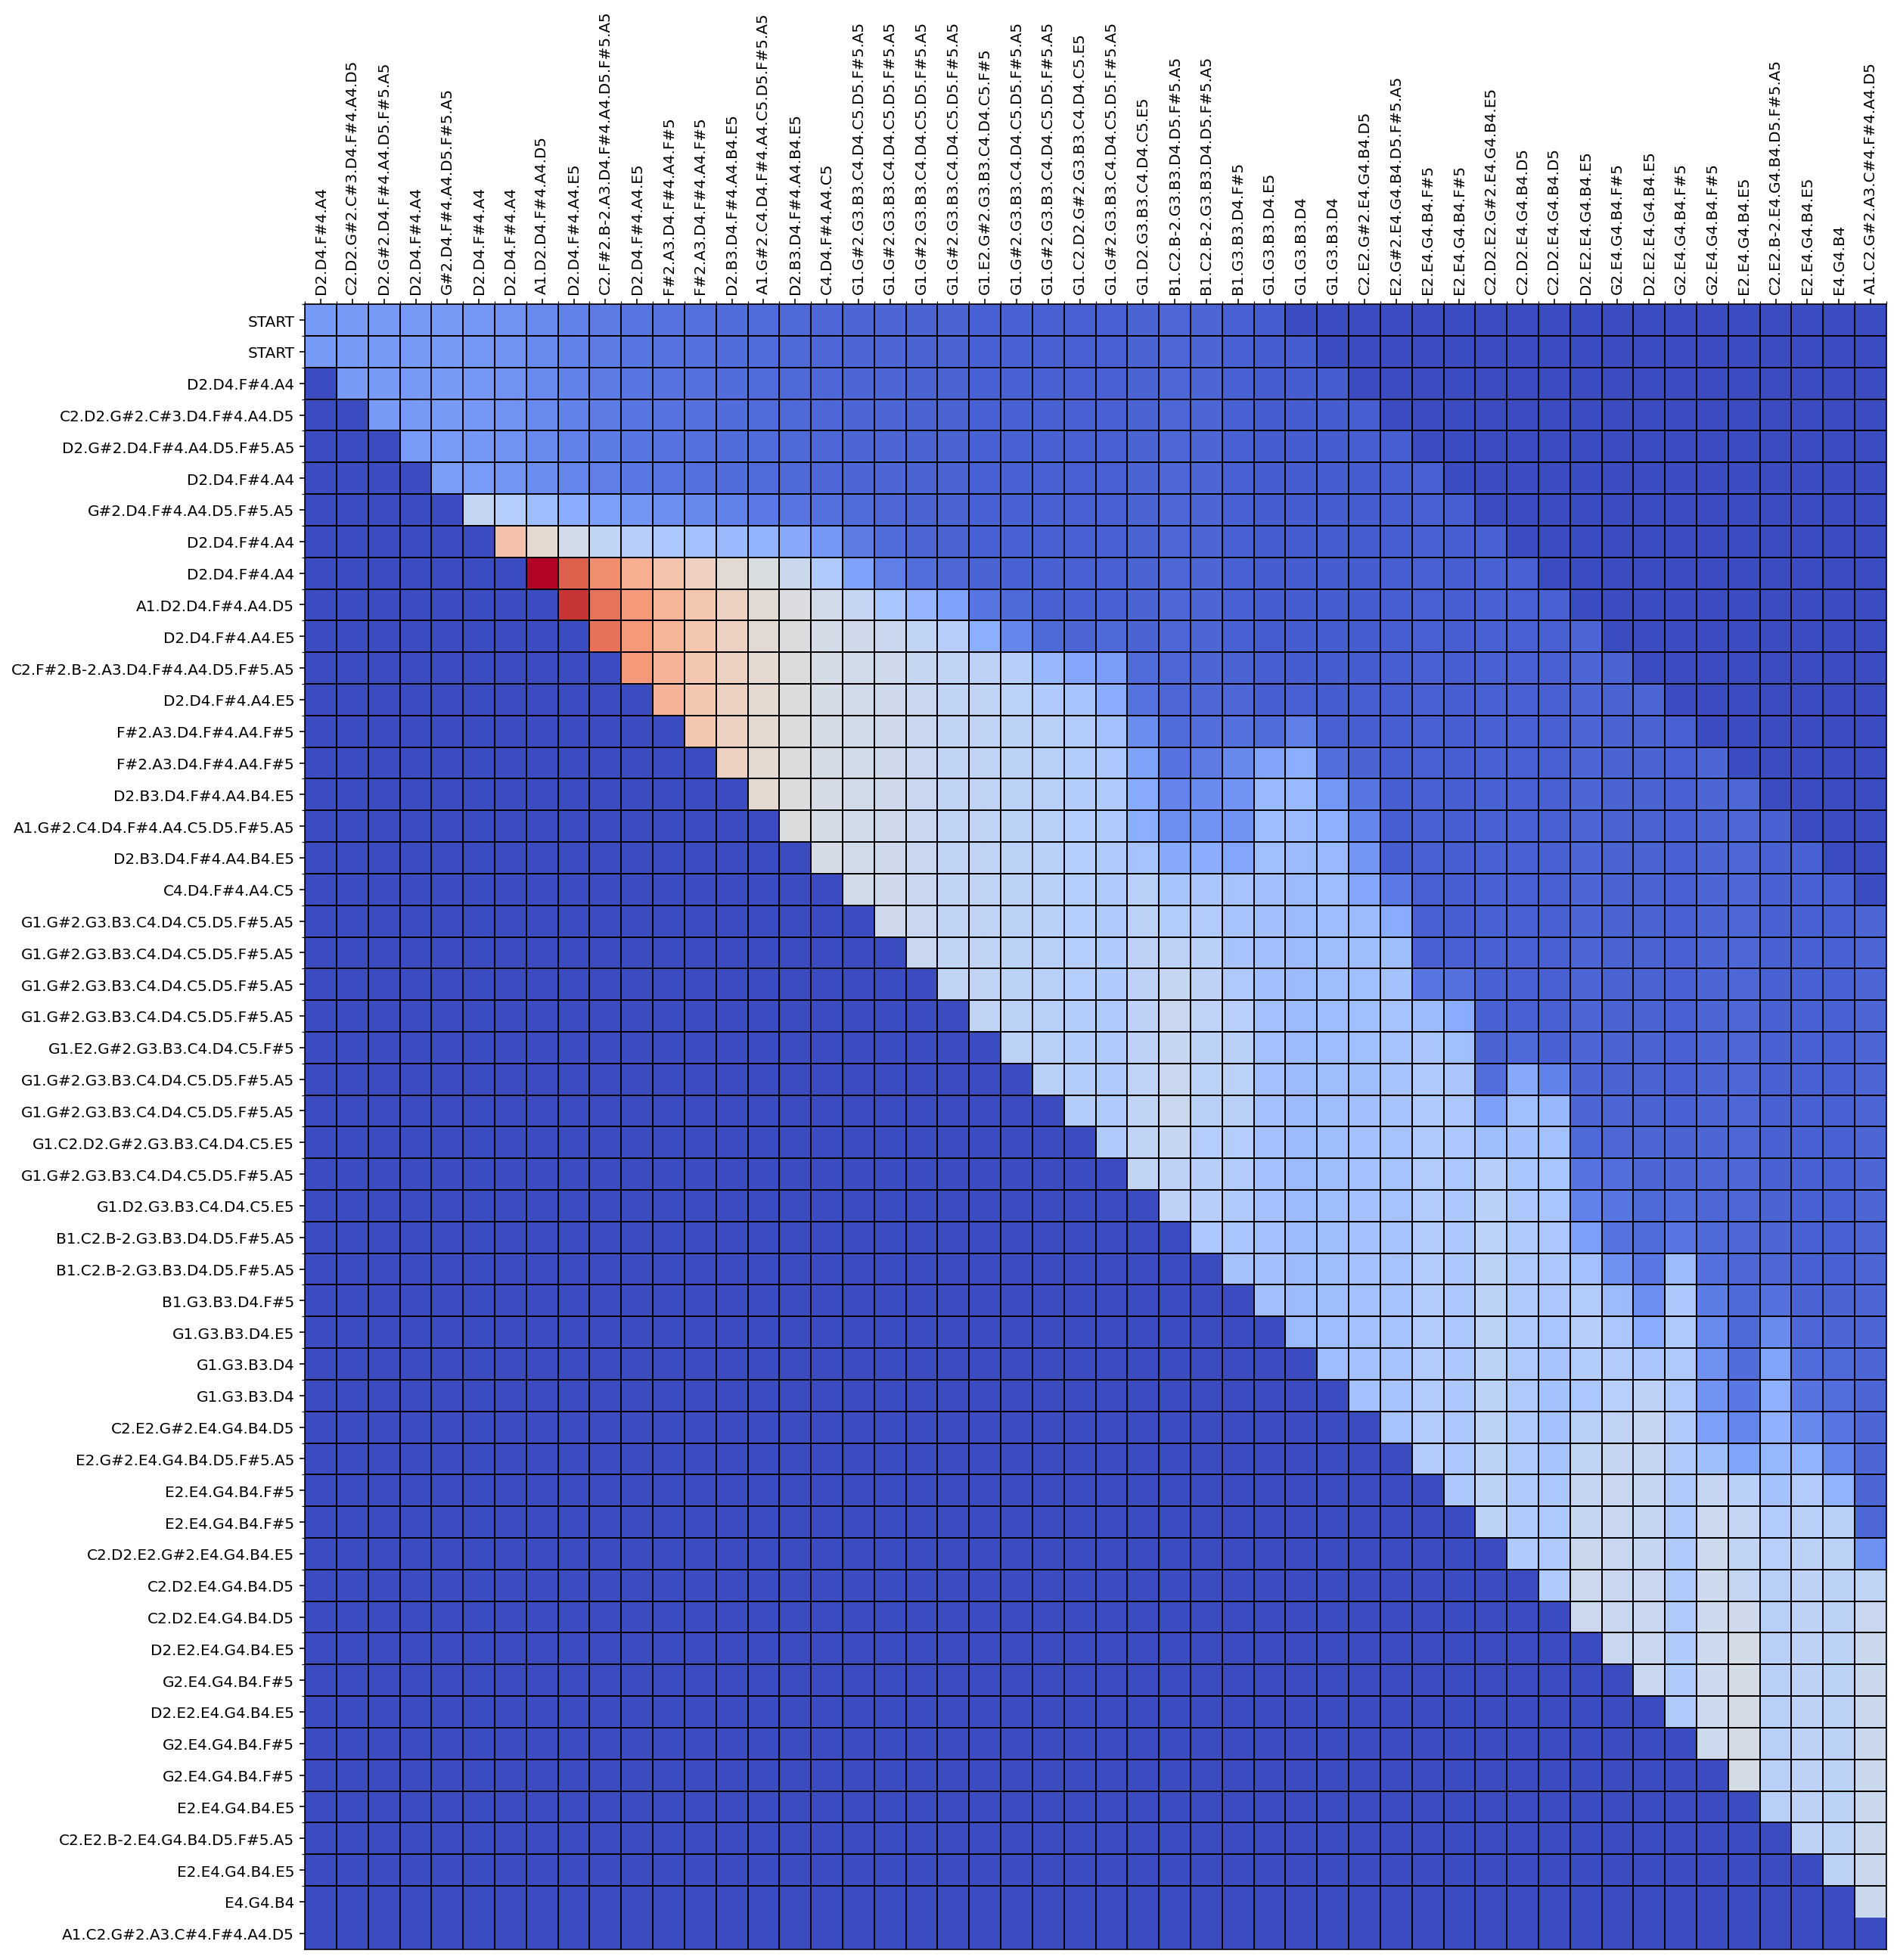

In [46]:
## 어텐션 그래프
if use_attention:
    fig, ax = plt.subplots(figsize=(20,20))

    im = ax.imshow(att_matrix[(seq_len-2):,], cmap='coolwarm', interpolation='nearest')


    

    # Minor ticks
    ax.set_xticks(np.arange(-.5, len(prediction_output)- seq_len, 1), minor=True);
    ax.set_yticks(np.arange(-.5, len(prediction_output)- seq_len, 1), minor=True);

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
    
    
    
    
    # We want to show all ticks...
    ax.set_xticks(np.arange(len(prediction_output) - seq_len))
    ax.set_yticks(np.arange(len(prediction_output)- seq_len+2))
    # ... and label them with the respective list entries
    ax.set_xticklabels([n[0] for n in prediction_output[(seq_len):]])
    ax.set_yticklabels([n[0] for n in prediction_output[(seq_len - 2):]])

    # ax.grid(color='black', linestyle='-', linewidth=1)

    ax.xaxis.tick_top()


    
    plt.setp(ax.get_xticklabels(), rotation=90, ha="left", va = "center",
             rotation_mode="anchor")

    plt.show()